<a href="https://colab.research.google.com/github/u5638928/u5638928-DataScience-GenAI-Submissions/blob/main/Machine_learning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will start of by loading the data in a data frame. To do this I will use the prompt to AI "load the data set into a data frame" .

In [ ]:
import pandas as pd

df = pd.read_csv('/content/loan_data.csv')
display(df.head())

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412,0
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034,1
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033,1
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522,1


The data frame seems to have been created successfully, now I will check if there is any missing data using the code from "2_05_Exploratory_Data_Analysis.ipynb"


In [ ]:
df.isnull().sum()


,0
age,0
years_employed,0
annual_income,0
credit_score,0
credit_history_years,0
savings_assets,0
current_debt,0
defaults_on_file,0
delinquencies_last_2yrs,0
derogatory_marks,0


This is good, there seems to be no missing data.

Now I will try using descriptive statistics to learn a bit more about the data. I will do this by using the code from "2_05_Exploratory_Data_Analysis.ipynb"

In [ ]:
df.describe()


,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.957060,7.454868,50062.892040,643.614820,8.168274,3595.619400,14290.442220,0.053480,0.55464,0.147640,33041.874000,15.498591,0.285724,0.701999,0.233995,0.550460
std,11.118603,7.612097,32630.501014,64.731518,7.207552,13232.399398,13243.757493,0.224991,0.84505,0.412996,26116.185102,4.067942,0.159787,0.465788,0.155268,0.497452
min,18.000000,0.000000,15000.000000,348.000000,0.000000,0.000000,60.000000,0.000000,0.00000,0.000000,500.000000,6.000000,0.002000,0.008000,0.003000,0.000000
25%,26.000000,1.300000,27280.500000,600.000000,2.000000,130.000000,5581.000000,0.000000,0.00000,0.000000,12300.000000,12.180000,0.161000,0.333000,0.111000,0.000000
50%,35.000000,4.900000,41607.500000,643.000000,6.100000,568.000000,10385.000000,0.000000,0.00000,0.000000,26100.000000,15.440000,0.265000,0.622000,0.207000,1.000000
75%,43.000000,11.400000,62723.250000,687.000000,12.600000,2271.000000,18449.250000,0.000000,1.00000,0.000000,48500.000000,18.870000,0.389000,1.010250,0.337000,1.000000
max,70.000000,39.900000,250000.000000,850.000000,30.000000,300000.000000,163344.000000,1.000000,9.00000,4.000000,100000.000000,23.000000,0.800000,2.001000,0.667000,1.000000


There are a lot of **variables** within this data, but I will note the most interesting observations. We can see the m

The first step here is to firstly split the y and then scale the x to prevent data leakage.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/loan_data.csv')

X = df.drop('loan_status', axis=1)
y = df['loan_status']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (50000, 15)
Shape of y: (50000,)


I now have the x data set and a seperate set for the y variable.

Now, I will apply Min-Max scaling to the features. This is important for normalization, ensuring all features contribute equally to the model's loss function without larger magnitudes dominating.

I will use the AI prompt "Scale the X variables"

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to X and transform X
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame with original column names
X = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled DataFrame
display(X.head())

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,0.423077,0.431078,0.045017,0.685259,0.176667,0.002983,0.065897,0.0,0.000000,0.0,0.001005,0.648235,0.527569,0.007526,0.007530
1,0.288462,0.182957,0.119519,0.555777,0.116667,0.000563,0.100990,0.0,0.111111,0.0,0.530653,0.476471,0.478697,0.616658,0.615964
2,0.461538,0.027569,0.024851,0.679283,0.280000,0.000057,0.047721,0.0,0.000000,0.0,0.016080,0.725294,0.469925,0.046663,0.046687
3,0.673077,0.012531,0.060200,0.685259,0.326667,0.004933,0.070693,0.0,0.111111,0.0,0.024121,0.749412,0.496241,0.045660,0.045181
4,0.269231,0.313283,0.207051,0.561753,0.240000,0.000697,0.075721,0.0,0.000000,0.0,0.995980,0.465882,0.241855,0.781234,0.781627


That has seemed to run successfully, now all x variables are on a scale from 0-1.

I will now do a train-test split, I will use the prompt "Split X and Y into X_train, X_test,  y_train,  y_test".

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (40000, 15)
Shape of X_test: (10000, 15)
Shape of y_train: (40000,)
Shape of y_test: (10000,)


We'll begin with a standard decision tree model WITHOUT adjusting for any hyperparameters

With the data now preprocessed and scaled, I will begin building machine learning models. I'll start with Logistic Regression, which is a strong baseline for binary classification problems. I will use L2 regularization.

I will copy the code from GitHub "4_02_Logistics_Regression.ipynb"

I will have to edit the code as my variable is called 'y_train' not 'Y_train', capitals are important to look out for.

In [ ]:
from sklearn.linear_model import LogisticRegression as LogR

# create the model
logR_algo = LogR(penalty='l2')
logR_algo

LogisticRegression()

In [ ]:
logR_model = logR_algo.fit(X_train, y_train)
logR_model

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

# predict the test data
predict = logR_model.predict(X_test)

# seperate the first five predictions and the first five real values in y_test
for i in range(5):
  print(f'Predicted: {round(predict[i],2)}')
  print(f'Real: {y_test.iloc[i]}') # Access by positional index
  print("\n")

print("\n")

print(f'Accuracy: {round(accuracy_score(y_test, predict),2)}') # Corrected Y_test to y_test

Predicted: 1
Real: 1


Predicted: 1
Real: 1


Predicted: 0
Real: 0


Predicted: 0
Real: 0


Predicted: 1
Real: 1




Accuracy: 0.84


The model achieved an accuracy of 0.84 (or 84%) on the test set. This means that 84% of the time, the model correctly predicted whether a loan would be approved or not. This is a good baseline performance for a Logistic Regression model.


Now I will train a decision tree classifier

In [1]:
from sklearn.tree import DecisionTreeClassifier as DTC

# create the model with hyperparameters
DTC_algo = DTC(max_depth=5, min_samples_split=10)
DTC_algo

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [ ]:
DTC_model = DTC_algo.fit(X_train, y_train)
DTC_model


DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# predict the test data
predict = DTC_model.predict(X_test)

# seperate the first five predictions and the first five real values in y_test
for i in range(5):
  print(f'Predicted: {round(predict[i],2)}')
  print(f'Real: {y_test.iloc[i]}') # Changed to .iloc[i] for positional access
  print("\n")

print("\n")

print(f'Accuracy: {round(accuracy_score(y_test, predict),2)}')

Predicted: 1
Real: 1


Predicted: 1
Real: 1


Predicted: 0
Real: 0


Predicted: 0
Real: 0


Predicted: 1
Real: 1




Accuracy: 0.84


The accuracy score is the same as it was for logistic regression, I will now prepare a confusion matric for this data set with the absence of parameters.

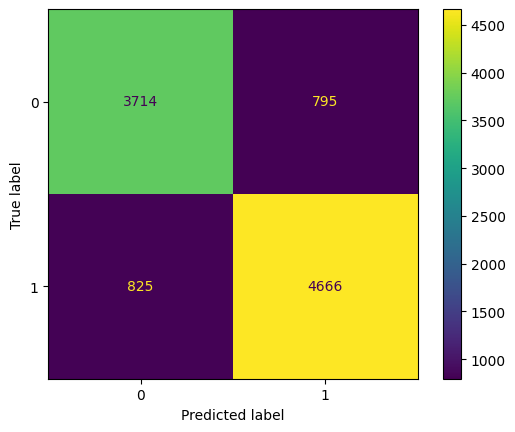

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay as CM

# create a confusion matrix
CM.from_predictions(y_test, predict)